In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf.__version__)

2.11.0


In [3]:
import IPython.display as display
import matplotlib.pyplot as plt
import random
import time

from tensorflow.keras import datasets, layers, models
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

In [4]:
train_dir = '/content/drive/MyDrive/dataset_small/train'
validation_dir = '/content/drive/MyDrive/dataset_small/validation'

In [5]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(192, 192, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(26, activation='softmax'))

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 190, 190, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 95, 95, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 93, 93, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 46, 46, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 44, 44, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 22, 22, 128)      0

In [8]:
from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(192, 192),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(192, 192),
        batch_size=20,
        class_mode='binary')

Found 1456 images belonging to 26 classes.
Found 1430 images belonging to 26 classes.


In [9]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 192, 192, 3)
labels batch shape: (20,)


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=len(train_generator),
      epochs=20,
      validation_data=validation_generator,
      validation_steps=len(validation_generator))

Epoch 1/20
73/73 [==============================] - 656s 9s/step - loss: 3.1108 - accuracy: 0.0948 - val_loss: 2.5422 - val_accuracy: 0.3070
Epoch 2/20
73/73 [==============================] - 234s 3s/step - loss: 1.8295 - accuracy: 0.4739 - val_loss: 1.5666 - val_accuracy: 0.5860
Epoch 3/20
73/73 [==============================] - 243s 3s/step - loss: 0.8657 - accuracy: 0.7301 - val_loss: 1.3063 - val_accuracy: 0.6427
Epoch 4/20
73/73 [==============================] - 250s 3s/step - loss: 0.4086 - accuracy: 0.8784 - val_loss: 1.5437 - val_accuracy: 0.6937
Epoch 5/20
73/73 [==============================] - 248s 3s/step - loss: 0.1586 - accuracy: 0.9512 - val_loss: 1.6507 - val_accuracy: 0.6902
Epoch 6/20
73/73 [==============================] - 249s 3s/step - loss: 0.1246 - accuracy: 0.9698 - val_loss: 2.2271 - val_accuracy: 0.6986
Epoch 7/20
73/73 [==============================] - 248s 3s/step - loss: 0.1200 - accuracy: 0.9691 - val_loss: 2.0102 - val_accuracy: 0.7196
Epoch 8/20
73

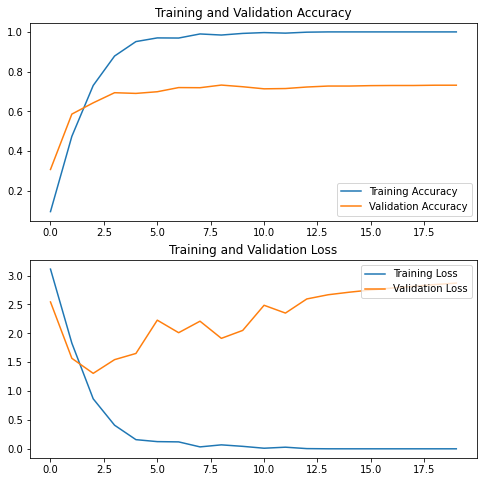

In [13]:
import matplotlib.pyplot as plt

accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(epochs_range, accuracy, label='Training Accuracy')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [14]:
model.save('model.h5')

In [15]:
!pip install tensorflowjs

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.5/16.5 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.9/40.9 KB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.3/204.3 KB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.9/73.9 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 67.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.0/239.0 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.9/154.9 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 50.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.9/87.9 KB 9.0 MB/s eta 0:00:00
  Attempting uninst

In [16]:
!tensorflowjs_converter \
    --input_format=keras \
    model.h5 \
    tfjs_model

2023-02-19 08:54:32.044737: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 08:54:32.044911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/nvidia/lib:/usr/local/nvidia/lib64
2023-02-19 08:54:32.044935: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


In [17]:
!zip -r /content/model.zip /content/tfjs_model

  adding: content/tfjs_model/ (stored 0%)
  adding: content/tfjs_model/group1-shard6of7.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard1of7.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard3of7.bin (deflated 8%)
  adding: content/tfjs_model/model.json (deflated 84%)
  adding: content/tfjs_model/group1-shard4of7.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard7of7.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard5of7.bin (deflated 8%)
  adding: content/tfjs_model/group1-shard2of7.bin (deflated 8%)


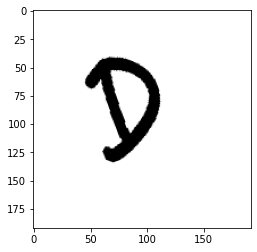

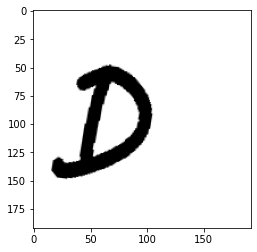

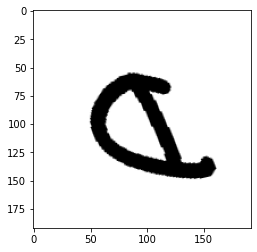

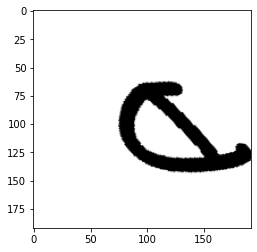

In [24]:
datagen = ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')
import keras.utils as image
train_letterD_dir = os.path.join(train_dir, 'letterD')
validation_letterD_dir = os.path.join(validation_dir, 'letterD')
fnames = [os.path.join(train_letterD_dir, fname) for fname in os.listdir(train_letterD_dir)]

img_path = fnames[3]
img = image.load_img(img_path, target_size=(192, 192))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break

plt.show()

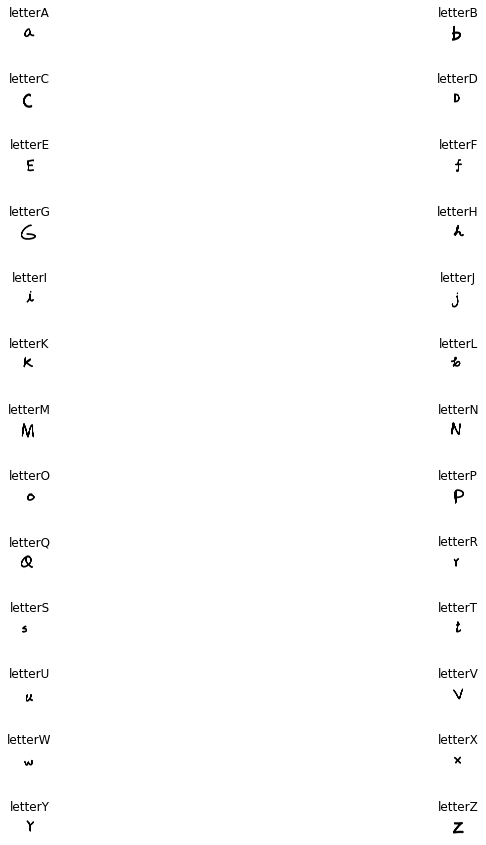

In [46]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

data_path = "/content/drive/MyDrive/dataset_small/train"
class_names = os.listdir(data_path)
num_images_per_class = 1
num_rows = 13
num_cols = 2
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15,15))

for i, class_name in enumerate(class_names):
    class_path = os.path.join(data_path, class_name)
    images = os.listdir(class_path)
    for j in range(num_images_per_class):
        image_name = random.choice(images)
        image_path = os.path.join(class_path, image_name)
        img = mpimg.imread(image_path)
        row = i // num_cols
        col = i % num_cols
        axes[row, col].imshow(img)
        axes[row, col].set_title(class_name)
        axes[row, col].axis("off")
plt.subplots_adjust(wspace=0.05, hspace=2)
plt.show()